In [1]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
import math
from tsmom_model import *
import numpy as np
from datetime import datetime
import statsmodels.formula.api as sm
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
sns.set(font_scale=1)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Hand cleansed
Hand cleaned to removed duplicates

In [2]:
cleansed=load_amihud_markets_price()

tsmom_model.py:146: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data=pd.read_csv('Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:148: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  qd=pd.read_csv('liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')


In [3]:
cleansed.count().count()

123

# Amihud methodology

Amihud (2002) developed the illiquidity measure expressed by:

$$ Amihud = \frac{|r_t|}{\text{volume}_t} $$

where $r_t$ is the return on day $t$ and $Volume_t$ is the dollar volume on day $t$. 

The benefit of taking the daily return is to weight the move by change of price and the volume.


In [4]:
amihud=calculate_amihud_liquidity(cleansed)[:'2016'] 

tsmom_model.py:29: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data=pd.read_csv('Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='mean')
tsmom_model.py:31: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  v=pd.read_csv('volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='sum')
tsmom_model.py:33: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=250,center=False).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:33: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:36: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future versio

In [48]:
d_map=sector_map()
d_map.keys()

['Commodities', 'Equities', 'Currencies', 'Fixed Income']

In [52]:
df=pd.DataFrame()
d_map=sector_map(amihud)
for sect in d_map.keys():
    df[sect]=amihud[d_map[sect]].median(axis=1)

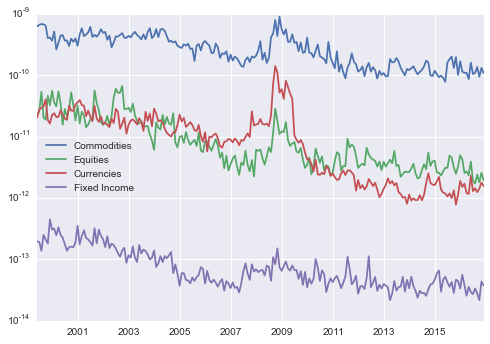

In [53]:
df.dropna().plot(logy=True)

In [7]:
s = pd.Series()
for sect in mp.Sector.unique():
    s[sect]= mp[mp.Sector==sect].Sector.count()

In [8]:
res=pd.DataFrame()
res['Mean']=df.mean()*1e13
res['Standard Deviation']=df.std()*1e13
res['Skew']=df.skew()
res['Kurtosis']=df.kurt()
res['Number of Markets']=s

In [9]:
print res.to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &         Mean &  Standard Deviation &  Skew &  Kurtosis &  Number of Markets \\
\midrule
Equities     &   118.477147 &          130.707109 &   0.0 &       0.0 &                 29 \\
Commodities  &  2858.823052 &         1620.978327 &   0.0 &       0.0 &                 76 \\
Currencies   &   137.153551 &          172.952374 &   0.0 &       0.0 &                  8 \\
Fixed Income &     0.893606 &            0.751524 &   0.0 &       0.0 &                 32 \\
\bottomrule
\end{tabular}



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d29f050>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10a5d5810>]], dtype=object)

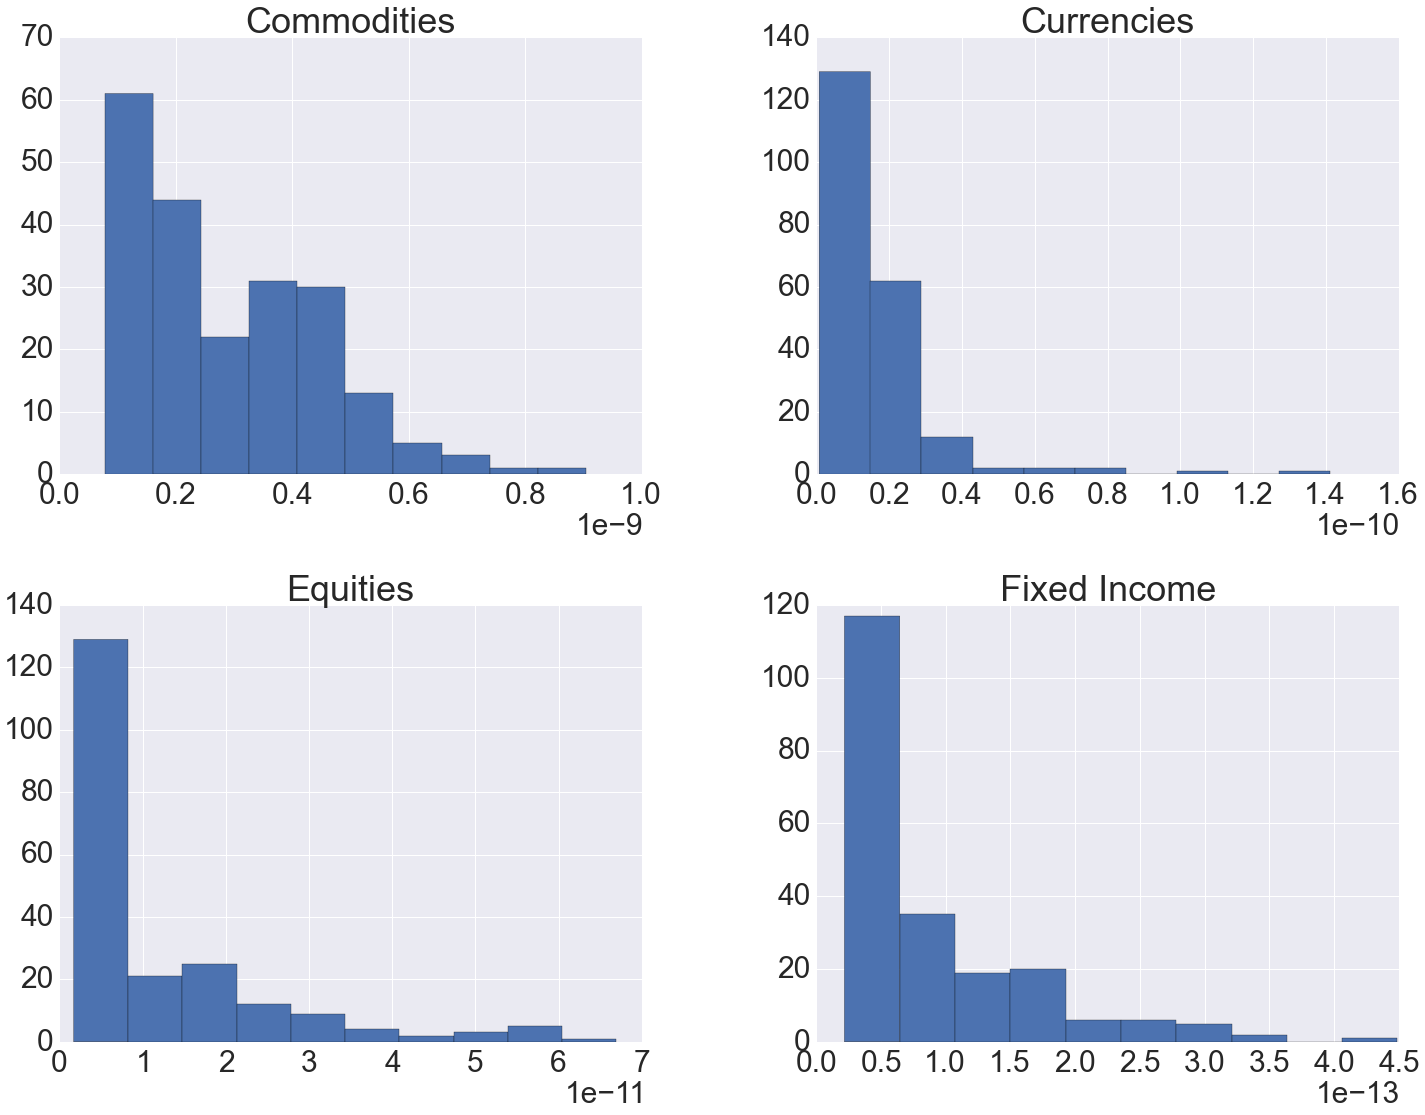

In [10]:
df.hist()

In [31]:
sns.pairplot?